#   <center> <font style="color:rgb(100,109,254)"> Contour Analysis </font> </center>


In [35]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## <font style="color:rgb(134,19,348)"> Image moments  </font>
Image moments are like weighted average (moment) of the image pixels' intensities, they help you to calculate some features like center of mass of the object, area of the object etc. 

lets first read an image and display its contour

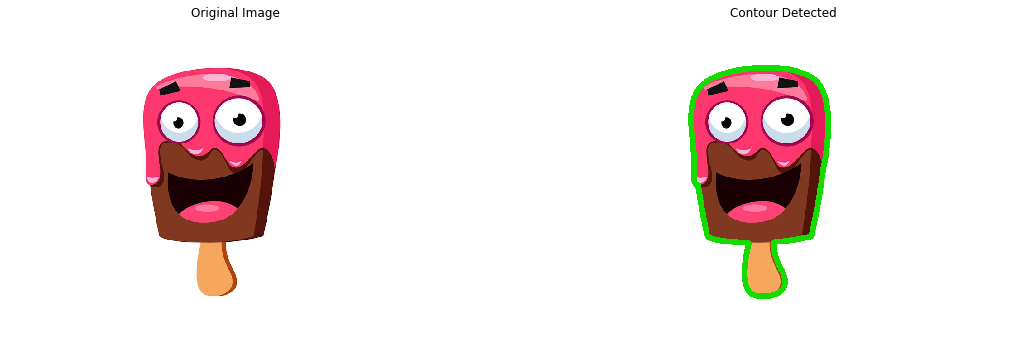

In [36]:
img = cv2.imread('media/M4/momentsample.png',1)
original = img.copy()

grayimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(grayimg,234,255,1)  

contours,hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img, contours, -1, (0,220,20), 12)

plt.figure(figsize=[18,18])
plt.subplot(121);plt.imshow(original[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(122);plt.imshow(img[:,:,::-1]);plt.title("Contour Detected");plt.axis('off');

Now we can get the image moment of this contour by using `cv2.moments()` which gives us a dictionary of various properties to use.

[```retval=cv.moments(array)```](https://docs.opencv.org/4.2.0/d8/d23/classcv_1_1Moments.html#a0382b98fdb23acdcb05c91a2a44e5a1f)

- `array` single-channel, 8-bit or floating-point 2D array, this is where we pass in our target contour


In [37]:
# extract the target contours
cnt = contours[0]

# get its moments
M = cv2.moments(cnt)

# print all the moments
print( M)

{'m00': 111010.0, 'm10': 50165792.666666664, 'm01': 34269732.83333333, 'm20': 23319459172.333332, 'm11': 15486600235.0, 'm02': 12227959805.166666, 'm30': 11123759972655.0, 'm21': 7182555992945.583, 'm12': 5530458059464.75, 'm03': 4853068637756.75, 'mu20': 649368605.0422173, 'mu11': -7386.467063903809, 'mu02': 1648601292.7079296, 'mu30': -1285838962.4492188, 'mu21': -16353065317.069427, 'mu12': 4606423956.067017, 'mu03': 60318729465.80664, 'nu20': 0.05269471775824382, 'nu11': -5.993942333224907e-07, 'nu02': 0.1337800736601247, 'nu30': -0.0003131708453656673, 'nu21': -0.003982849671868503, 'nu12': 0.0011219116285653393, 'nu03': 0.014690850137414212}


### <font style="color:rgb(134,19,348)"> Area of Contour </font>
Now many of these moments encode interesting properties. For e.g. you can get the area of contour by extracting `m00`. <br>
Alternatively you can also get area by `cv2.contourArea()`

In [38]:
area_method1 = cv2.contourArea(cnt)
area_method2 = M['m00']
print(area_method1,area_method2)

111010.0 111010.0


###  <font style="color:rgb(134,19,348)"> Getting Center of the contour </font>

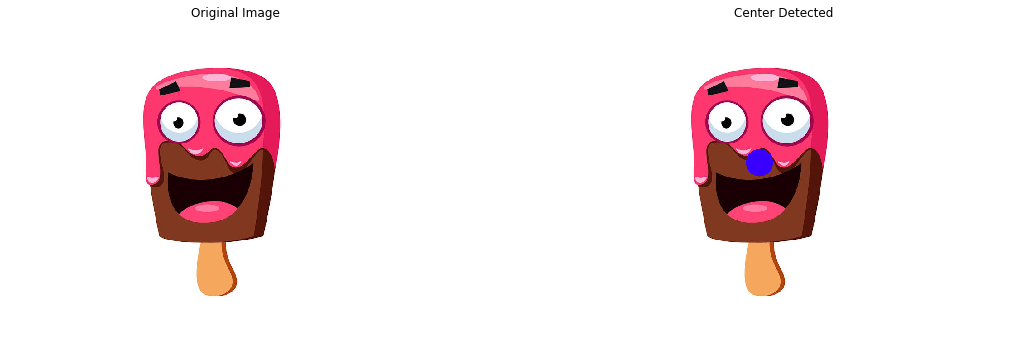

In [39]:
img = original.copy()

cx =    int(M['m10'] / M['m00'])
cy =    int(M['m01'] / M['m00'])

# cx,cy are the center points
cv2.circle(img,(cx,cy), 30, (255,0,55), -1)

plt.figure(figsize=[18,18])
plt.subplot(121);plt.imshow(original[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(122);plt.imshow(img[:,:,::-1]);plt.title("Center Detected");plt.axis('off');

**You can check if the contour is convex or not by the following method.**

In [40]:
cv2.isContourConvex(cnt)

False

## <font style="color:rgb(134,19,348)"> Hu- moments </font>
Hu-Moments are some unique mome
nts which are invariant to translation, and some other variations

**lets make a function which can make some transformations on the image whenever we require them**

In [41]:
def transform(translate = True, scale = False, rotate = False, path = 'media/M4/momentsample.png',display = True):
    
    img = cv2.imread(path,1)
    original = img.copy()
    
    rows,cols  = img.shape[:2]
    
    # get two random numbers  for translation
    x,y = np.random.randint(40,65,size=(2,))
    
    # get random number of angle
    angle = np.random.randint(10,180)
    
    # get random float value for resizing the image
    scale_value = round(np.random.uniform(0.6, 1.3),2)    
    
    # just randomly making positive values negative depending upon if there are even or odd (not important)
    if x % 2:
        x = -x
    if y % 2:
        y = -y
    
    # apply translation according to the random numbers
    if translate:
        M = np.float32([[1,0,x],[0,1,y]])
        img = cv2.warpAffine(img,M,(cols,rows), borderMode=1) 
        print("Applied Translation of x: {} , y: {}".format(x,y))
        
    # apply rotation according to the random angle
    if rotate:
        M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
        img = cv2.warpAffine(img,M,(cols,rows), borderMode=1)
        print("Applied rotation of angle: {}".format(angle))

        
    if scale:
        img = cv2.resize(img, (0,0), fx=scale_value, fy=scale_value)
        print("Image resized to: {}%".format(scale_value*100))


    grayimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(grayimg,234,255,1)  
                
    contours,hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    
    if display:
        plt.figure(figsize=[18,18])
        plt.subplot(121);plt.imshow(original[:,:,::-1]);plt.title("Original Image")
        plt.subplot(122);plt.imshow(img[:,:,::-1]);plt.title("Modified")   
    
    return cnt

**Now this function can randomly translate, rotate, scale images**

Applied Translation of x: 44 , y: -43
Applied rotation of angle: 22
Image resized to: 101.0%


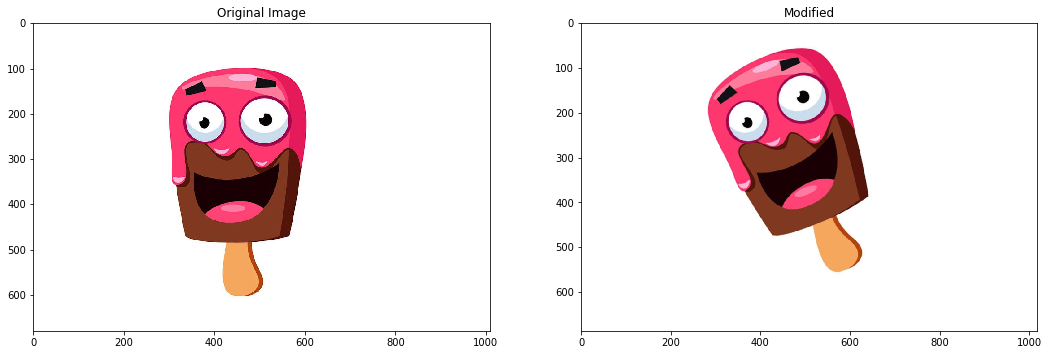

In [47]:
modified_contour = transform(rotate= True,scale=True)

### <font style="color:rgb(134,19,348)"> Aspect ratio </font>
It is the ratio of width to height of bounding rect of the object, Its invariant to translation.

Aspect ratio intitially 0.6031746031746031
Applied Translation of x: -61 , y: 46
Aspect ratio After Modification 0.6031746031746031


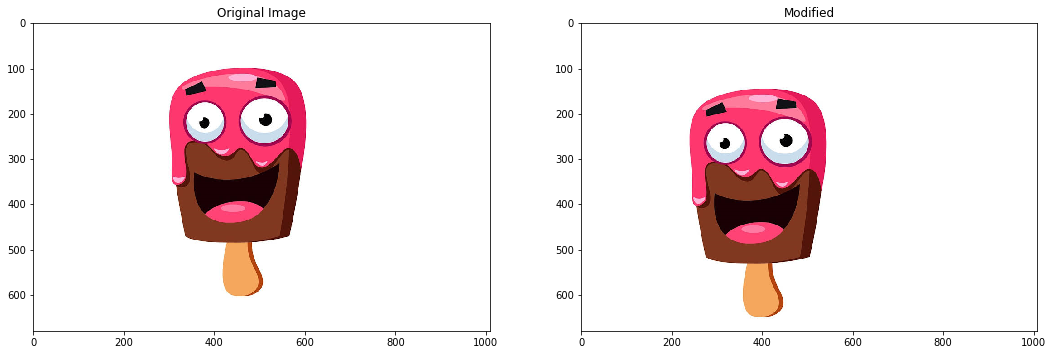

In [48]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
print("Aspect ratio intitially {}".format(aspect_ratio))

modified_contour = transform()
x,y,w,h = cv2.boundingRect(modified_contour)
aspect_ratio = float(w)/h

print("Aspect ratio After Modification {}".format(aspect_ratio))

### <font style="color:rgb(134,19,348)"> Extent </font>
Extent is the ratio of contour area to bounding rectangle area. Its invariant to Translation & Scaling. 

extent intitially 0.7245326858813701
Applied Translation of x: 60 , y: -53
Image resized to: 129.0%
extent After Modification 0.7249778184277076


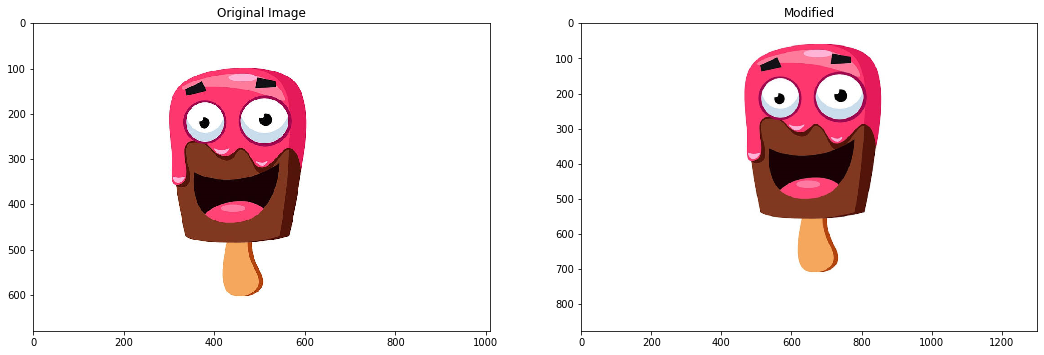

In [49]:
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
print("extent intitially {}".format(extent))

modified_contour = transform(scale = True)
area = cv2.contourArea(modified_contour)
x,y,w,h = cv2.boundingRect(modified_contour)
rect_area = w*h
extent = float(area)/rect_area

print("extent After Modification {}".format(extent))

### <font style="color:rgb(134,19,348)">  Equivalent Diameter </font>
Equivalent Diameter is the diameter of the circle whose area is same as the contour area. Its Invariant to Translation & Rotation.

Equi diameter intitially 375.95521257332024
Applied Translation of x: 60 , y: -63
Applied rotation of angle: 174
Equi diameter After Modification 376.43665936187404


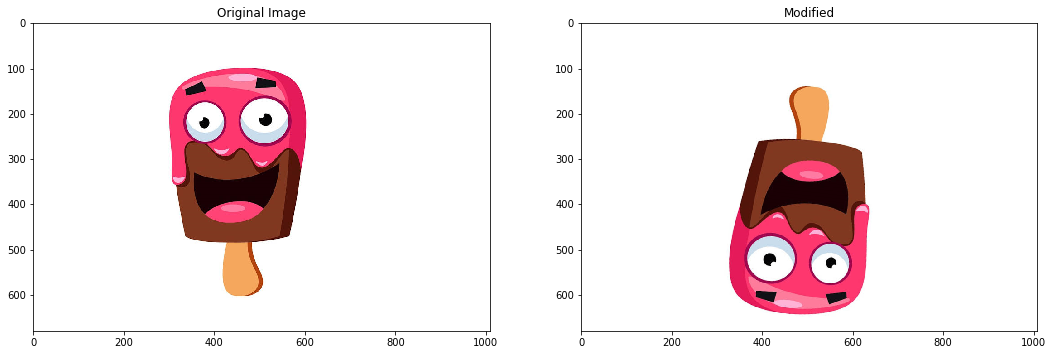

In [50]:
area = cv2.contourArea(cnt)

# We are making pi r square to 2 pi which is the diameter
equi_diameter = np.sqrt(4*area/np.pi)

print("Equi diameter intitially {}".format(equi_diameter))

modified_contour = transform(rotate= True)
area = cv2.contourArea(modified_contour)
equi_diameter = np.sqrt(4*area/np.pi) # we are making pi r square to 2 pi which is the diameter

print("Equi diameter After Modification {}".format(equi_diameter))

### <font style="color:rgb(134,19,348)"> Solidity  </font>
Solidity is the ratio of contour area to its convex hull area. Its invariant to Translation, rotation and Scaling.

Solidity intitially 0.9264305177111717
Applied Translation of x: 40 , y: 62
Applied rotation of angle: 136
Image resized to: 115.99999999999999%
Solidity After Modification 0.9277810870954102


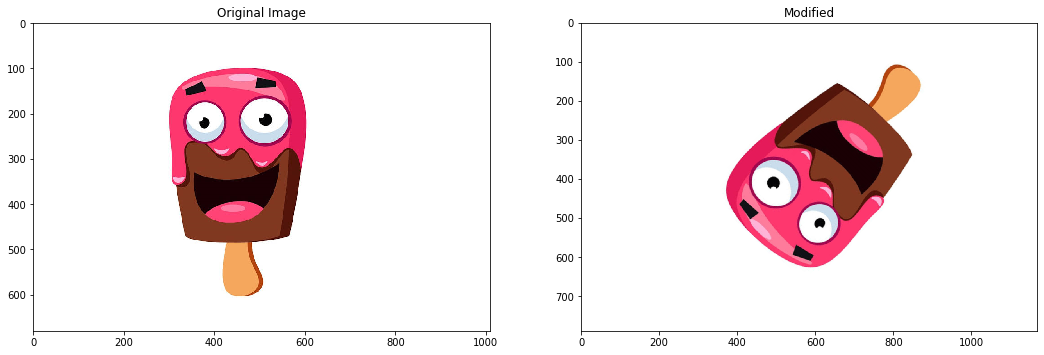

In [51]:
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
solidity

print("Solidity intitially {}".format(solidity))

modified_contour = transform(scale = True,rotate= True)
area = cv2.contourArea(modified_contour)
hull = cv2.convexHull(modified_contour)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area

print("Solidity After Modification {}".format(solidity))

### <font style="color:rgb(134,19,348)">Orientation  </font>
Orientation is the angle at which object is directed. You can easily get the orientation of the object. Its invariant to translation and scaling <br>
Following method also gives the Major Axis and Minor Axis lengths. 

In [52]:
modified_contour = transform(translate=True,rotate= True, display=False)
(x,y),(MA,ma),angle = cv2.fitEllipse(modified_contour)
angle
print("Elliptical Angle is {}".format(angle))

Applied Translation of x: -59 , y: 40
Applied rotation of angle: 10
Elliptical Angle is 171.52000427246094


**Below method also gives the angle of the contour by fitting a rotated box instead of an ellipse**

In [53]:
modified_contour = transform(translate=True,rotate= True, display=False)
(x,y),(w,mh),angle = cv2.minAreaRect(modified_contour)
print("RotatedRect Angle is {}".format(angle))

Applied Translation of x: -57 , y: 52
Applied rotation of angle: 135
RotatedRect Angle is -45.0


**Note:** *Don't be confused by why all three angles are showing different results, they all calculate angles differently , for e.g  ellipse fits an ellipse and then calculates the angle that an ellipse makes, similarly the rotated rect calculates the angle the rectangle makes. For triggering decisions based on calculated angle you would first need to find what angle the respective method is making at the given orientations of object.*

## <font style="color:rgb(134,19,348)"> Actual Angle of Rotated Object </font>
Below is a script that I put up which helps you give the approximate angle from 0-180 of rotation of object. The first part fits a line on the contour.

[```line	=	cv.fitLine(	points, distType, param, reps, aeps[, line]	)```](https://docs.opencv.org/4.2.0/d3/dc0/group__imgproc__shape.html#gaf849da1fdafa67ee84b1e9a23b93f91f)



The second part calculates the angle of rotation.

Applied Translation of x: -45 , y: 62
Applied rotation of angle: 32
Modified Angle of line is 32.40823248358794


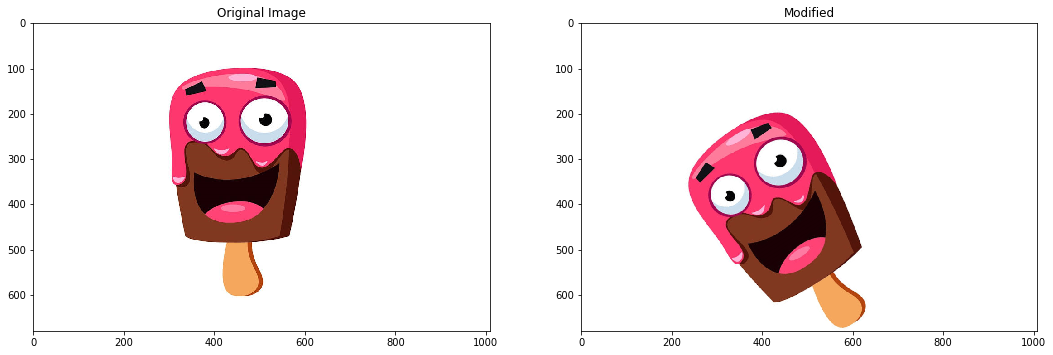

In [66]:
img = original.copy() 
modified_contour = transform(translate=True,rotate= True)

# this piece of code fits a line on the contour, just like you fit ellipse and other structures.
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(modified_contour, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)

#You can draw this line on the image if you want, ofcourse you have to display it too, to see it.
#cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)

# this line calculates the angle a line makes given x1,y1 and x2,y2
angle = np.rad2deg(np.arctan2(righty - lefty,0 - cols-1))

# This is some logic that I came up with, its part trial/error and part logic, this modifies the angle to be the same as the
# original one.
angle = 270 + angle
if angle > 360:
    angle = angle - 360
print("Modified Angle of line is {}".format(angle))

## <font style="color:rgb(134,19,348)"> Binary Mask of Contour </font>
Once you have a contour, you can easily get its binary mask (for blending, segmentation) or any other need.

Text(0.5, 1.0, 'Mask')

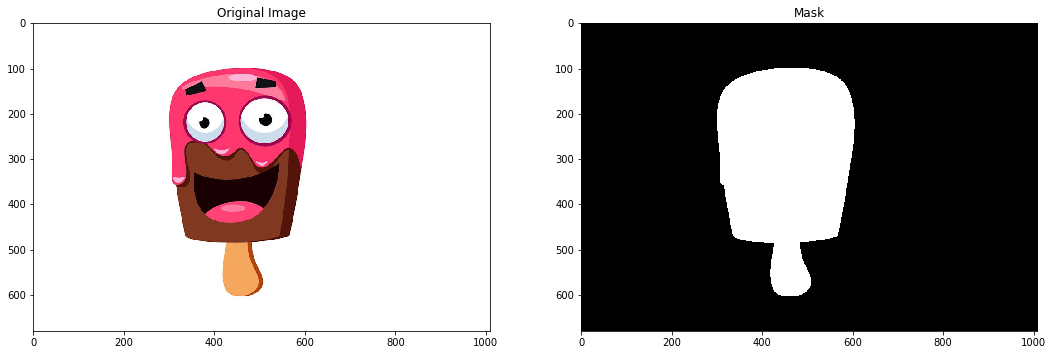

In [67]:
# make a mask of zeros of the same shape as the image but with a single channel
mask = np.zeros(original.shape[:2],np.uint8)

# now draw the contour on the mask and fill it with -1
cv2.drawContours(mask,[cnt],0,255,-1)

plt.figure(figsize=[18,18])
plt.subplot(121);plt.imshow(original[:,:,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(mask,cmap='gray');plt.title("Mask")

##  <font style="color:rgb(134,19,348)">Mean Color  </font>
Here, we can find the average color of an object. Or it can be average intensity of the object in gray scale mode. For this we will use the function `cv2.mean()` , you also pass in the mask so you only get the mean color of the contour and not the whole image.



(88.80195334180796, 79.10864232897069, 176.3043077363794, 0.0)


(-0.5, 1008.5, 679.5, -0.5)

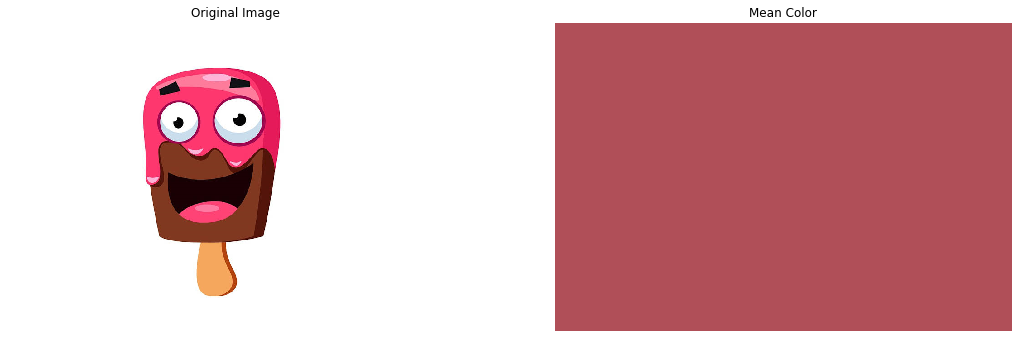

In [70]:
mean_val = cv2.mean(original,mask=mask)
print(mean_val)

# Now lets make an image consisting of just this color
img_mean = np.full((original.shape), (int(mean_val[0]),int(mean_val[1]),int(mean_val[2])), np.uint8) 

plt.figure(figsize=[18,18])
plt.subplot(121);plt.imshow(original[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(122);plt.imshow(img_mean[:,:,::-1]);plt.title("Mean Color");plt.axis('off')

## <font style="color:rgb(134,19,348)">  Extreme Points </font>
You can extract extreme points of a contour, Extreme Points means topmost, bottommost, rightmost and leftmost points of the object.

`argmin` and `argmax` gives you the index of minimum and maximum values, you can use this and search for the indexes for min and max values in your target axis. Then you can use the indexes to get the target points in the contour.

In [72]:
cnt.shape

(1057, 1, 2)

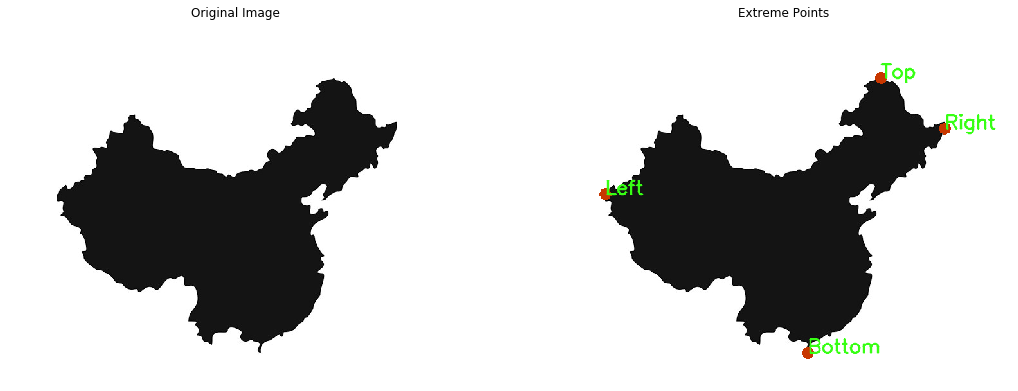

In [71]:
img = cv2.imread('media/M4/china.jpg',1)
original = img.copy()

grayimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(grayimg,234,255,1)  

contours,hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnt= contours[0]

# this is how you extract all the extreme points in opencv

leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
cv2.circle(img,leftmost,4,(0,55,200),10)  
cv2.putText(img,'Left',leftmost, cv2.FONT_HERSHEY_SIMPLEX, 1, (20,255,55), 2, cv2.LINE_AA)

rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
cv2.circle(img,rightmost,4,(0,55,200),10)
cv2.putText(img,'Right',rightmost, cv2.FONT_HERSHEY_SIMPLEX, 1, (20,255,55), 2, cv2.LINE_AA)

topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
cv2.circle(img,topmost,4,(0,55,200),10)
cv2.putText(img,'Top',topmost, cv2.FONT_HERSHEY_SIMPLEX, 1, (20,255,55), 2, cv2.LINE_AA)

bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
cv2.circle(img,bottommost,4,(0,55,200),10)
cv2.putText(img,'Bottom',bottommost, cv2.FONT_HERSHEY_SIMPLEX, 1, (20,255,55), 2, cv2.LINE_AA)

plt.figure(figsize=[18,18])
plt.subplot(121);plt.imshow(original[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(122);plt.imshow(img[:,:,::-1]);plt.title("Extreme Points");plt.axis('off');

## <font style="color:rgb(134,19,348)">  Point Polygon Test  </font>
This function finds the shortest distance between a point in the image and a contour. It returns the distance which is negative when point is outside the contour, positive when point is inside and zero if point is on the contour.

[```retval	=	cv.pointPolygonTest(contour, pt, measureDist)```](https://docs.opencv.org/4.2.0/d3/dc0/group__imgproc__shape.html#ga1a539e8db2135af2566103705d7a5722)

- `contour:`	Input contour.
- `pt:` Point tested against the contour.
- `measureDist:`	If true, the function estimates the signed distance from the point to the nearest contour edge. Otherwise, the function only checks if the point is inside a contour or not

In the following function, third argument is measureDist. If it is True, it finds the signed distance. If False, it finds whether the point is inside or outside or on the contour (it returns +1, -1, 0 respectively).

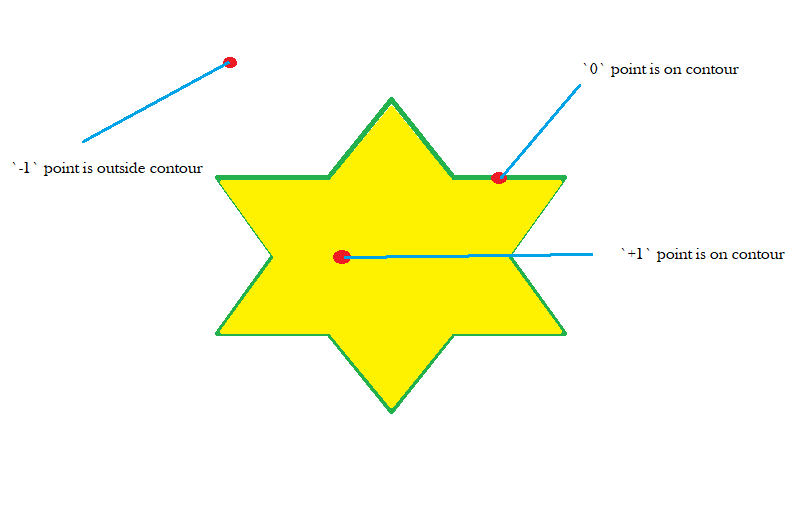

Note If you don’t want to find the distance, make sure third argument is False, because, it is a time consuming process. So, making it False gives about 2-3X speedup.

With x,y = 100,100 we get dist: -1.0
With x,y = 300,300 we get dist: 1.0
With x,y = 300,400 and measureDist True, we get dist: 13.45362404707371 which is distance from the nearest edge


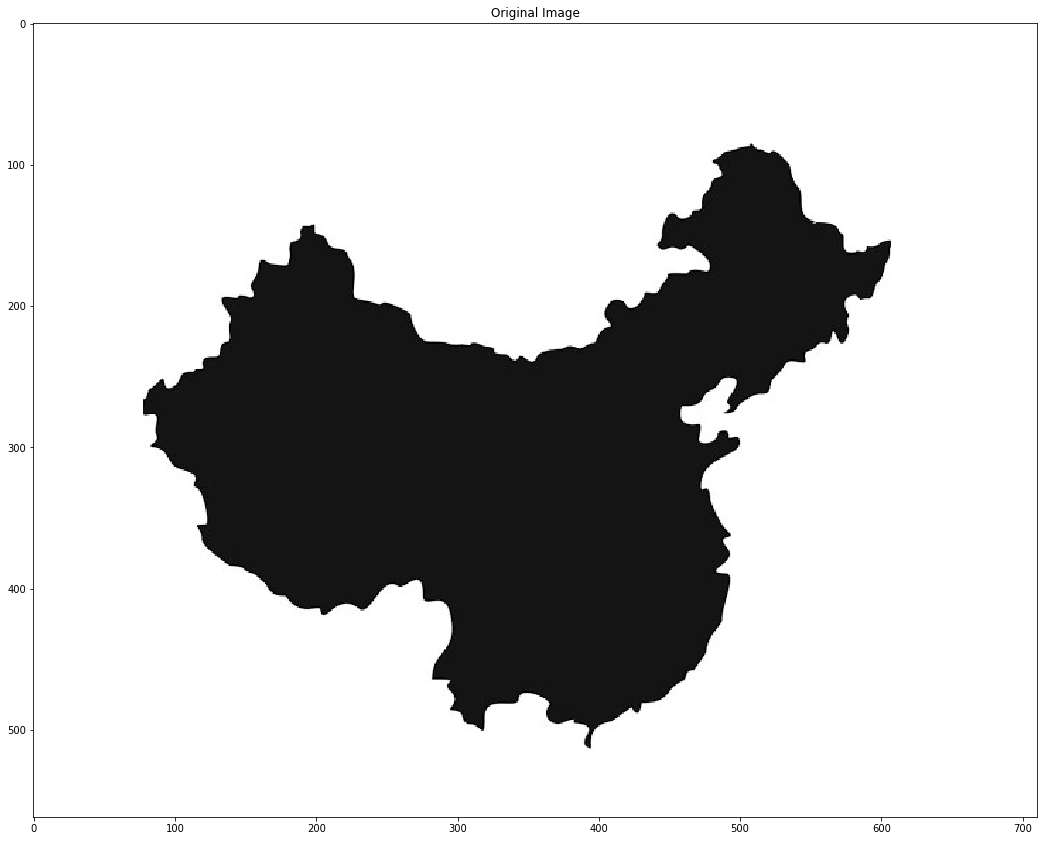

In [73]:
dist = cv2.pointPolygonTest(cnt,(100,100),False)
print("With x,y = 100,100 we get dist: {}".format(dist))

dist = cv2.pointPolygonTest(cnt,(300,300),False)
print("With x,y = 300,300 we get dist: {}".format(dist))

dist = cv2.pointPolygonTest(cnt,(300,400),True)
print("With x,y = 300,400 and measureDist True, we get dist: {} which is distance from the nearest edge".format(dist))


plt.figure(figsize=[18,18])
plt.imshow(original[:,:,::-1]);plt.title("Original Image");

# <font style="color:rgb(134,19,348)"> Match Shapes  </font>
In OpenCV you can actually compare 2 shapes and check how similar they using the function `cv2.matchShapes()` it compares shapes by comparing contours and returns a metric showing the similarity. The lower the result, the better match it is. It is calculated based on the hu-moment values. 

[```cv.matchShapes(	contour1, contour2, method, parameter	)```](https://docs.opencv.org/4.2.0/d3/dc0/group__imgproc__shape.html#gaadc90cb16e2362c9bd6e7363e6e4c317)

- `contour1`	First contour or gray scale image.
- `contour2`	Second contour or gray scale image.
- `method`	Comparison method, see [ShapeMatchModes](https://docs.opencv.org/4.1.0/d3/dc0/group__imgproc__shape.html#gaf2b97a230b51856d09a2d934b78c015f)
- `parameter:` Not supported at the moment


Lets make a simple function which we will call to run the shape matching analysis.


In [74]:
def shapematcher(img1,img2,display = True):
    ret, thresh = cv2.threshold(img1, 220, 255,1)
    ret, thresh2 = cv2.threshold(img2, 220, 255,1)
    
    contours1,hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnt1 = contours1[0]

    contours2,hierarchy2 = cv2.findContours(thresh2,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnt2 = contours2[0]
    
    if display:
        plt.figure(figsize=[18,18])
        plt.subplot(121);plt.imshow(img1,cmap='gray');plt.title("Image 1");plt.axis('off')
        plt.subplot(122);plt.imshow(img2, cmap= 'gray');plt.title("Image 2");plt.axis('off');
        
    score = cv2.matchShapes(cnt1,cnt2,1,0.0)
    return score 

**Now lets test it out on some image pairs**

The score for this pair is: 0.2849260817663166


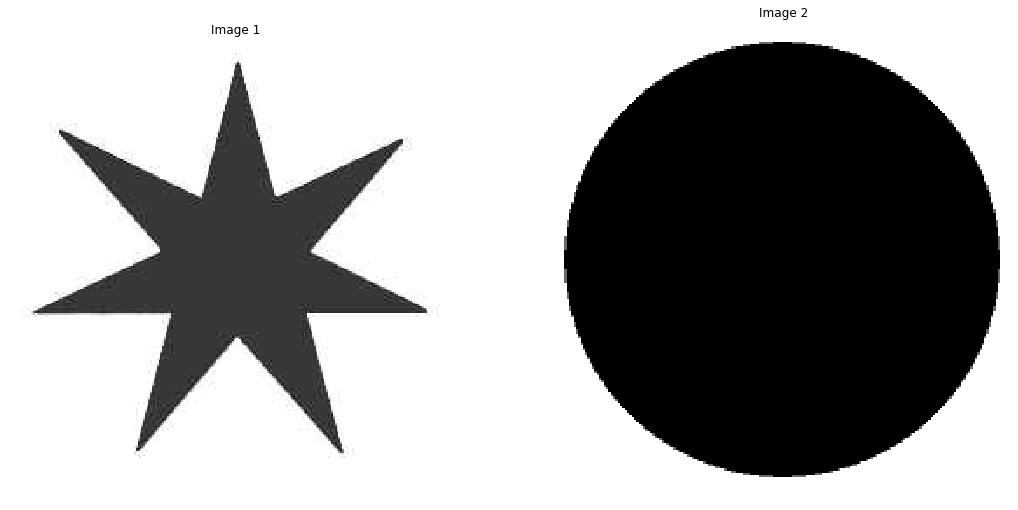

In [75]:
img1 = cv2.imread('media/M4/cstar.jpg',0)
img2 = cv2.imread('media/M4/circle.PNG',0)

score = shapematcher(img1,img2)
print("The score for this pair is: {}".format(score))

The score for this pair is: 0.2526912734836453


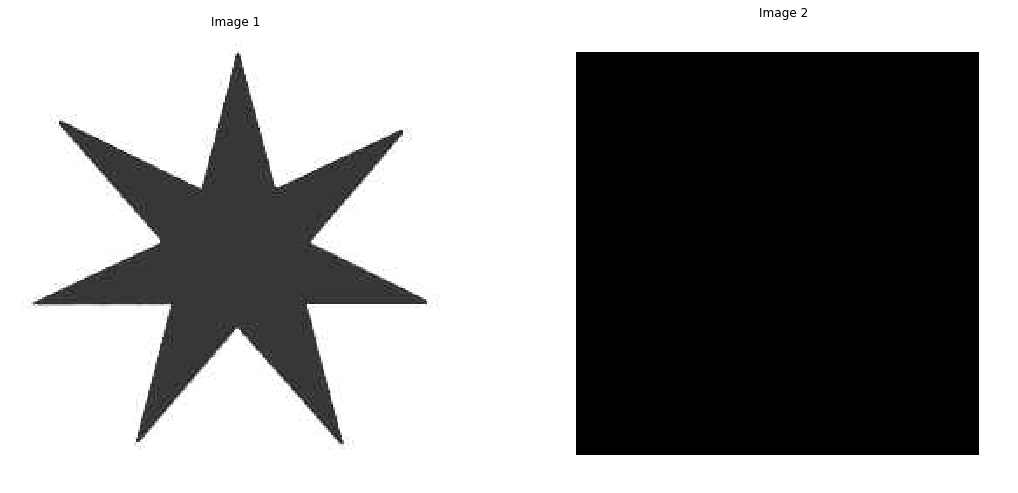

In [76]:
img1 = cv2.imread('media/M4/cstar.jpg',0)
img2 = cv2.imread('media/M4/square1.PNG',0)

score = shapematcher(img1,img2)
print("The score for this pair is: {}".format(score))

The score for this pair is: 0.06611568647744992


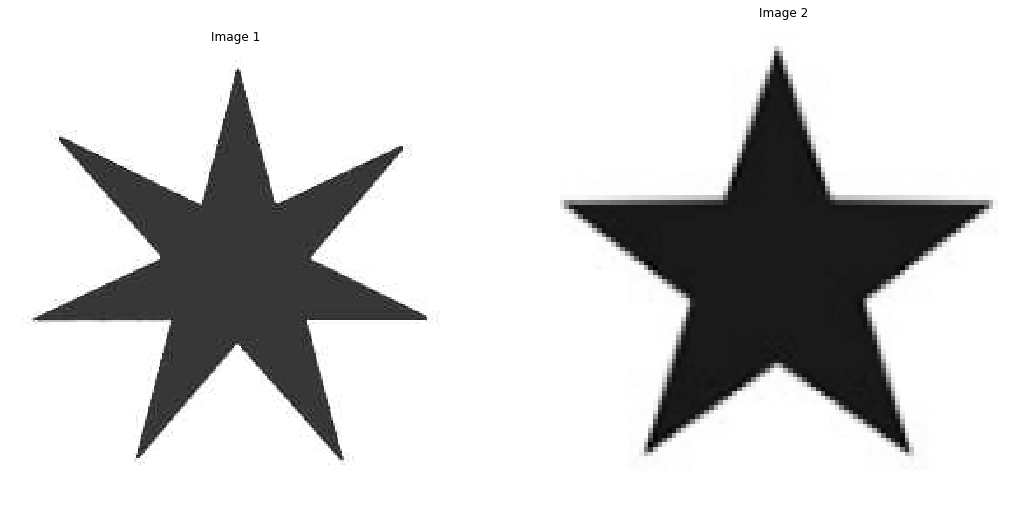

In [77]:
img1 = cv2.imread('media/M4/cstar.jpg',0)
img2 = cv2.imread('media/M4/star1.PNG',0)

score = shapematcher(img1,img2)
print("The score for this pair is: {}".format(score))

**Using Hue-moments you can even make your own custom shape matcher**

###  <font style="color:rgb(34,169,134)"> Assignment: Smart Object Detection </font>
In this assignment you should expand the object detector you built in the previous notebook, so what will you do now is besides detecting the object based on color you will also do shape analysis and detect only that object, and so you can have other random objects of same color and the algorithm will still be not effected by it. The best way to do this is to use an object like a ball or a rectangular book which have good structural properties.

In [ ]:
## ADD CODE HERE

